In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Life_train.csv')
df.head(5)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
1,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
2,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
3,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
4,2010,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2489 entries, 0 to 2488
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2489 non-null   int64  
 1   Life expectancy                  2489 non-null   float64
 2   Adult Mortality                  2489 non-null   float64
 3   infant deaths                    2489 non-null   int64  
 4   Alcohol                          2322 non-null   float64
 5   percentage expenditure           2489 non-null   float64
 6   Hepatitis B                      2009 non-null   float64
 7   Measles                          2489 non-null   int64  
 8    BMI                             2461 non-null   float64
 9   under-five deaths                2489 non-null   int64  
 10  Polio                            2471 non-null   float64
 11  Total expenditure                2293 non-null   float64
 12  Diphtheria          

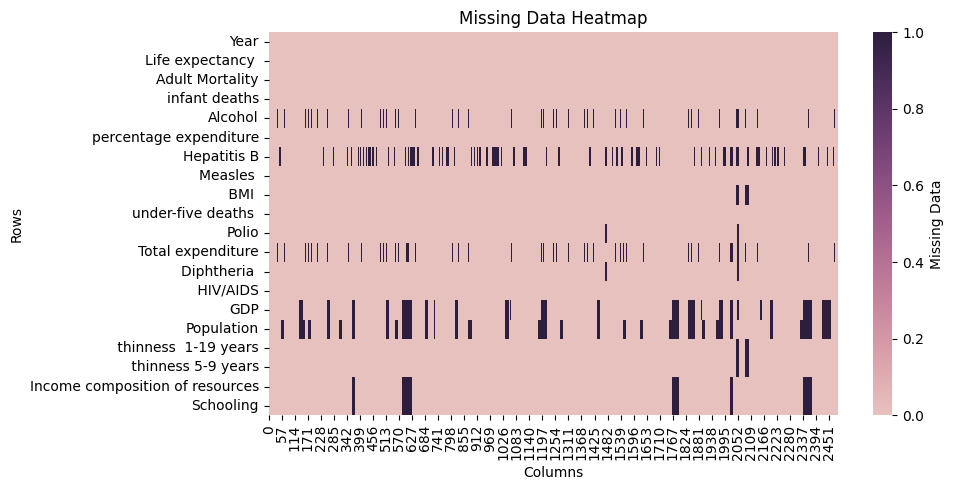

In [ ]:
# Создание экземпляра фигуры и осей для лучшего контроля и получения возможности изменять определенные свойства графика
fig, ax = plt.subplots(figsize=(10,5))

# Использование цветовой карты с параметром яркости .8 вместо .9 для увеличения контрастности и видимости отсутствующих данных
cmap = sns.cubehelix_palette(as_cmap=True, light=.8)

# Создание тепловой карты
sns.heatmap(df.isna().transpose(), cmap=cmap, cbar_kws={'label': 'Missing Data'}, ax=ax)

# Настройка осей
ax.set_title('Missing Data Heatmap')
ax.set_xlabel('Columns')
ax.set_ylabel('Rows')

# Автоматически настраивайте макет подзаголовка для лучшей видимости
plt.tight_layout()

plt.show()

In [ ]:
df_nan = df.loc[:, df.isnull().any()]
df_nan.isnull().sum() / len(df_nan) * 100 # Процент пропущенных значений

Alcohol                             6.709522
Hepatitis B                        19.284853
 BMI                                1.124950
Polio                               0.723182
Total expenditure                   7.874648
Diphtheria                          0.723182
GDP                                15.508236
Population                         22.257935
 thinness  1-19 years               1.124950
 thinness 5-9 years                 1.124950
Income composition of resources     5.865810
Schooling                           5.865810
dtype: float64

У нас нет столбцов, в которых больше 70-80% пропусков. Следовательно, не нужно ничего удалять. Заполним эти пропуски модой столбца.

In [ ]:
# код заполняет все пропущенные значения в каждом столбце DataFrame df наиболее часто встречающимся значением (модой) для этого столбца.
for col in df.columns:
  df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

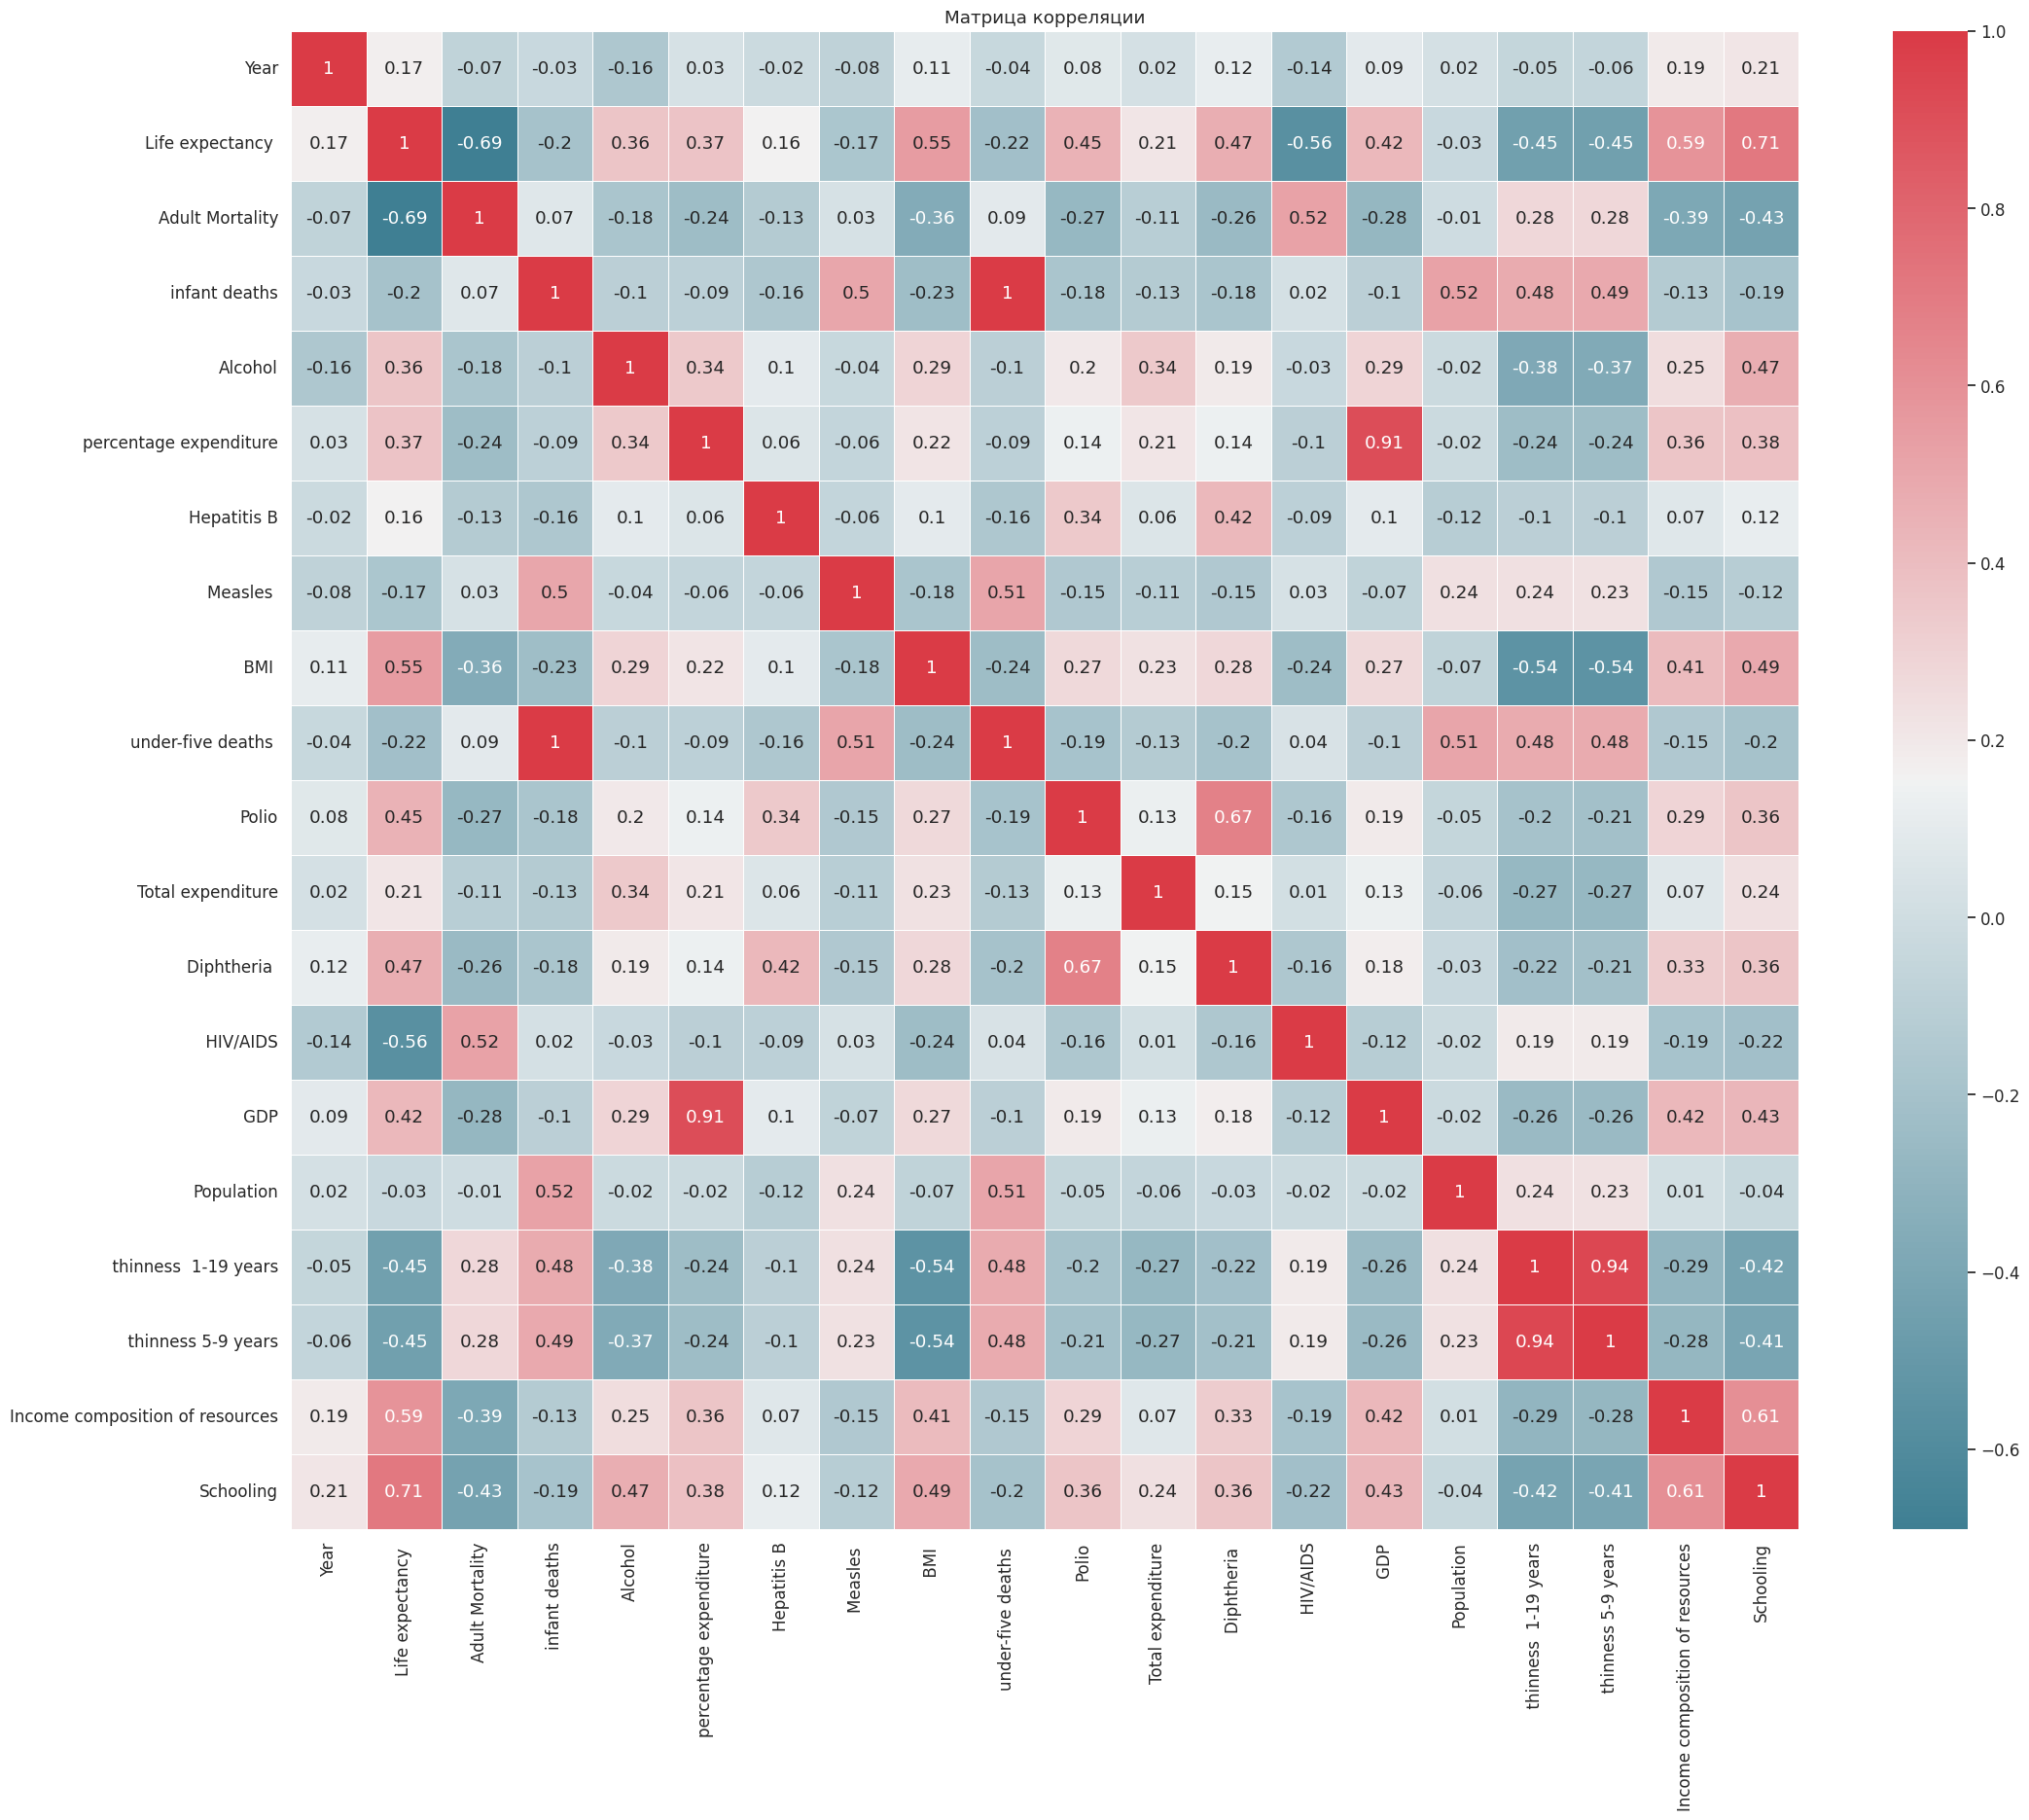

In [ ]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.1)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)

custom_cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap=custom_cmap)

plt.title('Матрица корреляции')
plt.show()

Скачок смертности в младенчестве при увеличении ожидаемой продолжительности жизни от 60 до 80 лет может иметь несколько возможных объяснений.

- Демографические факторы: Увеличение ожидаемой продолжительности жизни связано с улучшением общего уровня здоровья и доступности медицинской помощи, что ведет к снижению смертности на более поздних этапах жизни. Однако это не обязательно означает снижение младенческой смертности. Скачок смертности в младенчестве может быть связан с другими факторами, такими как изменение социальных условий, экономические факторы или изменение репродуктивного поведения, которые могут оказывать влияние на здоровье матери и новорожденного ребенка.

- Изменение в системе здравоохранения: При увеличении ожидаемой продолжительности жизни может происходить перестройка или изменение в системе здравоохранения, что может повлиять на качество медицинской помощи, доступность услуг и программы по снижению младенческой смертности. Если такие изменения не сопровождаются адекватными мерами по снижению младенческой смертности, это может привести к временному скачку в смертности в младенческом возрасте.

- Социально-экономические факторы: Увеличение ожидаемой продолжительности жизни может быть связано с изменением социально-экономических условий, таких как уровень образования, доступность жилья, питание и доступ к чистой воде. Влияние этих факторов на младенческую смертность может быть сложным и многофакторным, и скачок смертности в младенчестве может быть следствием изменений в этих социально-экономических условиях.

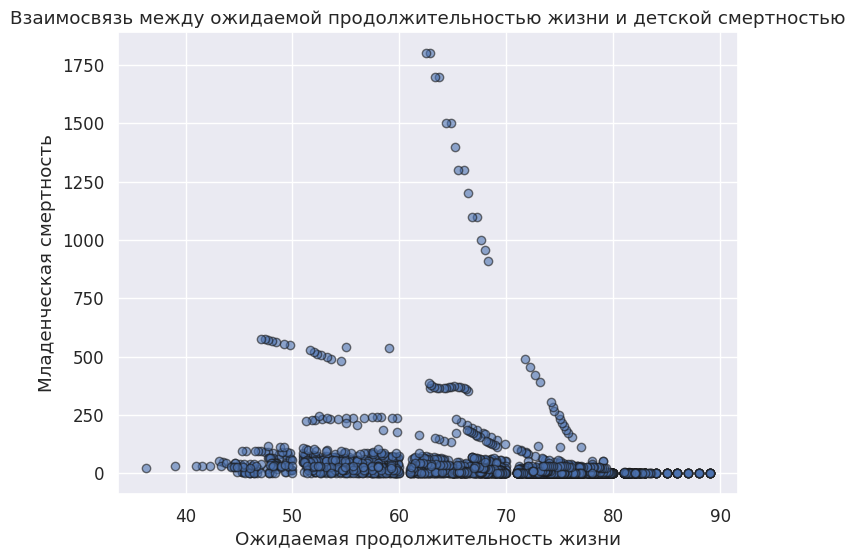

In [ ]:
# Данный код строит и отображает точечную диаграмму, которая показывает взаимосвязь между продолжительностью жизни и числом смертей младенце
plt.figure(figsize=(8, 6))

plt.scatter(df['Life expectancy '], df['infant deaths'], alpha=0.6, edgecolors='k')

plt.xlabel('Ожидаемая продолжительность жизни')
plt.ylabel('Младенческая смертность')
plt.title('Взаимосвязь между ожидаемой продолжительностью жизни и детской смертностью')

plt.show()

In [ ]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2.489000e+03,2489.000000,2489.000000,2489.000000,2489.000000
mean,2007.453998,69.135677,165.517075,31.925271,4.292089,719.997905,84.378063,2508.917638,38.426276,44.378063,82.561671,5.846356,82.217758,1.777581,6185.489676,9.851664e+06,4.794255,4.838168,0.588536,11.989594
std,4.593657,9.626188,125.091120,122.898636,4.050564,1968.953987,23.663939,11795.371317,19.922969,167.571112,23.381249,2.417052,23.904519,5.184826,13159.143926,5.344931e+07,4.429471,4.540113,0.252230,3.294776
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,4.100000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,63.000000,74.000000,0.000000,0.490000,4.344931,82.000000,0.000000,19.400000,0.000000,78.000000,4.380000,78.000000,0.100000,188.783165,6.775000e+03,1.500000,1.500000,0.460000,10.200000
50%,2007.000000,72.100000,144.000000,3.000000,3.150000,64.605901,95.000000,15.000000,43.800000,4.000000,93.000000,5.540000,93.000000,0.100000,1161.769350,5.479280e+05,3.300000,3.300000,0.659000,12.500000
75%,2011.000000,75.700000,228.000000,23.000000,7.380000,431.545247,99.000000,357.000000,56.500000,29.000000,97.000000,7.340000,97.000000,0.800000,4737.669960,4.538159e+06,7.100000,7.200000,0.772000,14.000000
max,2015.000000,89.000000,723.000000,1800.000000,17.310000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.600000


Пакет `sklearn.preprocessing` содержит в себе множество различных функции предобработки данных, в том числе функции, позволяющие выполнять масштабирование признаков:

- **StandardScaler()** - класс для стандартизации
- **MinMaxScaler()** - класс для нормализации

`StandardScaler()` применяет стандартизацию к данным, что означает, что он масштабирует данные таким образом, чтобы их среднее значение было равно нулю, а стандартное отклонение - единице. Это достигается путем вычитания среднего значения каждого признака и деления на стандартное отклонение. Стандартизация полезна, когда распределение данных не является нормальным или когда модель машинного обучения, с которой работаете, требует стандартизованных данных.

`MinMaxScaler()` применяет нормализацию к данным, что означает, что он масштабирует их таким образом, чтобы все значения находились в заданном диапазоне (обычно от 0 до 1). Нормализация особенно полезна, когда значения признаков имеют разный масштаб и необходимо привести их к одному единому диапазону.

- $x$ представляет собой набор признаков (факторов), которые используются для предсказания целевой переменной.

- $y$ представляет собой целевую переменную, которую необходимо предсказать.


In [ ]:
x = df.drop('Life expectancy ', axis=1)
y = df['Life expectancy ']
print(f'Features size: {x.shape}')
print(f'Target size: {y.shape}') # То, что нужно предсказать

Features size: (2489, 19)
Target size: (2489,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Создание экземпляра объекта StandardScaler
std = StandardScaler()

# Стандартизация данных с помощью StandardScaler
x_std = std.fit_transform(x)

# Преобразование стандартизированных данных в объект pandas DataFrame
x_std = pd.DataFrame(x_std, columns=x.columns)

# Вычисление описательных статистик стандартизированных данных
x_std.describe()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2.489000e+03,2.489000e+03,2.489000e+03,2.489000e+03,2.489000e+03,2.489000e+03,2.489000e+03,2.489000e+03,2.489000e+03,2.489000e+03,2.489000e+03,2.489000e+03,2.489000e+03,2.489000e+03,2489.000000,2.489000e+03,2.489000e+03,2.489000e+03,2.489000e+03
mean,-1.771361e-15,-1.056251e-16,1.712839e-17,1.884123e-16,3.996624e-17,-1.584376e-16,1.427366e-17,5.423990e-17,2.854732e-17,1.941218e-16,1.170440e-16,-5.209885e-17,3.425678e-17,2.283785e-17,0.000000,-8.564195e-18,-1.598650e-16,4.910139e-16,1.712839e-17
std,1.000201e+00,1.000201e+00,1.000201e+00,1.000201e+00,1.000201e+00,1.000201e+00,1.000201e+00,1.000201e+00,1.000201e+00,1.000201e+00,1.000201e+00,1.000201e+00,1.000201e+00,1.000201e+00,1.000201,1.000201e+00,1.000201e+00,1.000201e+00,1.000201e+00
min,-1.622998e+00,-1.315442e+00,-2.598213e-01,-1.057371e+00,-3.657488e-01,-3.524131e+00,-2.127463e-01,-1.878927e+00,-2.648844e-01,-3.403482e+00,-2.266173e+00,-3.356431e+00,-3.236210e-01,-4.700192e-01,-0.184354,-1.059991e+00,-1.043833e+00,-2.333798e+00,-3.639703e+00
25%,-9.697923e-01,-7.317503e-01,-2.598213e-01,-9.388453e-01,-3.635416e-01,-1.005133e-01,-2.127463e-01,-9.551839e-01,-2.648844e-01,-1.951388e-01,-6.067933e-01,-1.764773e-01,-3.236210e-01,-4.557980e-01,-0.184228,-7.438624e-01,-7.354087e-01,-5.097016e-01,-5.432703e-01
50%,-9.885128e-02,-1.720458e-01,-2.354061e-01,-2.820147e-01,-3.329299e-01,4.489561e-01,-2.114744e-01,2.697793e-01,-2.410092e-01,4.465299e-01,-1.267733e-01,4.511452e-01,-3.236210e-01,-3.818432e-01,-0.174101,-3.374116e-01,-3.388632e-01,2.794184e-01,1.549448e-01
75%,7.720897e-01,4.995997e-01,-7.263762e-02,7.624941e-01,-1.465299e-01,6.180237e-01,-1.824741e-01,9.073626e-01,-9.178881e-02,6.176415e-01,6.180854e-01,6.185112e-01,-1.885845e-01,-1.100460e-01,-0.099432,5.206510e-01,5.203189e-01,7.275117e-01,6.103025e-01
max,1.643031e+00,4.457510e+00,1.438934e+01,3.214497e+00,9.529772e+00,6.180237e-01,1.777953e+01,1.966654e+00,1.465715e+01,7.031973e-01,4.863779e+00,7.021942e-01,9.418296e+00,8.587941e+00,24.027729,5.172254e+00,5.234805e+00,1.425427e+00,2.613876e+00


In [ ]:
# Создание экземпляра объекта MinMaxScaler
mmsc = MinMaxScaler()

# Нормализация данных с помощью MinMaxScaler
x_norm = mmsc.fit_transform(x)

# Преобразование нормализованных данных в объект pandas DataFrame
x_norm = pd.DataFrame(x_norm, columns=x.columns)

# Вычисление описательных статистик нормализованных данных
x_norm.describe()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000
mean,0.496933,0.227863,0.017736,0.247520,0.036961,0.850797,0.011824,0.488594,0.017751,0.828767,0.317838,0.826987,0.033219,0.051890,0.007614,0.170082,0.166252,0.620819,0.582019
std,0.306244,0.173256,0.068277,0.234137,0.101076,0.241469,0.055591,0.260091,0.067028,0.243555,0.140282,0.246438,0.102670,0.110422,0.041310,0.160488,0.159302,0.266066,0.159941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.101108,0.000000,0.027746,0.000223,0.826531,0.000000,0.240209,0.000000,0.781250,0.232734,0.783505,0.000000,0.001570,0.000005,0.050725,0.049123,0.485232,0.495146
50%,0.466667,0.198061,0.001667,0.181503,0.003317,0.959184,0.000071,0.558747,0.001600,0.937500,0.300058,0.938144,0.000000,0.009735,0.000423,0.115942,0.112281,0.695148,0.606796
75%,0.733333,0.314404,0.012778,0.426012,0.022153,1.000000,0.001683,0.724543,0.011600,0.979167,0.404527,0.979381,0.013861,0.039741,0.003507,0.253623,0.249123,0.814346,0.679612
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Линейная регрессия (Linear Regression) - это один из наиболее простых и широко используемых алгоритмов машинного обучения, который предсказывает зависимую переменную на основе линейной комбинации независимых переменных. Он стремится найти наилучшую прямую линию, которая соответствует данным наиболее точно.

Алгоритм LinearRegression строит линейную модель, представленную уравнением:

$y = b0 + b1x1 + b2x2 + ... + bn*xn$

где:

- $y$ - зависимая переменная, которую мы пытаемся предсказать,
- $x1, x2, ..., xn$ - независимые переменные (факторы), используемые для предсказания,
- $b0, b1, b2, ..., bn$ - коэффициенты (веса), которые модель настраивает в процессе обучения.

Цель LinearRegression состоит в том, чтобы настроить коэффициенты модели таким образом, чтобы минимизировать сумму квадратов ошибок между фактическими значениями зависимой переменной и предсказанными значениями. Этот процесс называется "наименьшие квадраты" (least squares).

Обучение модели LinearRegression включает в себя подгонку линии, которая лучше всего соответствует данным. Это достигается путем нахождения оптимальных значений коэффициентов, которые минимизируют сумму квадратов ошибок.

In [ ]:
from sklearn import metrics 
from sklearn.linear_model import LinearRegression
df_test = pd.read_csv("Life_test.csv")
df_test

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2005,116.0,0,11.59,167.231990,NaN,2,57.5,0,96.0,6.89,96.0,0.1,1224.245900,4442.0,1.8,1.8,0.777,13.6
1,2011,139.0,2,9.10,10.325889,96.0,4189,57.7,2,89.0,5.53,89.0,0.1,92.277825,2147528.0,2.9,3.1,0.798,15.7
2,2003,126.0,1,5.52,58.459760,98.0,0,48.6,2,95.0,7.60,98.0,0.1,4267.135780,329174.0,2.2,2.2,0.728,12.8
3,2008,295.0,237,2.09,0.000000,65.0,12461,18.2,324,64.0,4.46,65.0,1.8,NaN,NaN,1.8,1.7,NaN,NaN
4,2010,178.0,23,0.24,84.623025,82.0,190,16.4,30,83.0,6.43,82.0,0.2,592.183522,2723137.0,16.7,17.2,0.515,11.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,2012,257.0,39,0.01,151.899429,92.0,1613,26.7,56,91.0,4.79,92.0,0.9,1629.822200,2573349.0,6.7,6.6,0.563,11.2
435,2011,144.0,12,4.37,184.307362,85.0,6,55.0,14,85.0,6.64,85.0,0.1,7227.739680,4646646.0,2.2,2.0,0.700,13.0
436,2012,13.0,1,7.71,158.257602,92.0,31,53.6,1,93.0,8.57,92.0,0.1,4142.869175,3825.0,2.6,2.8,0.749,13.4
437,2010,57.0,0,10.01,2198.590865,NaN,77,55.4,0,96.0,11.70,95.0,0.1,74276.718420,782499.0,0.5,0.4,0.920,15.4


In [ ]:
for col in df_test.columns:
  df_test[col].fillna(df_test[col].mode()[0], inplace=True) # Заполняем пустые значения модой

`Абсолютная ошибка (MAE)` измеряет абсолютную разницу между фактическими и предсказанными значениями. Она рассчитывается как среднее абсолютное значение разницы между каждым предсказанным значением и соответствующим фактическим значением. Абсолютная ошибка показывает, насколько средняя ошибка модели в абсолютных единицах измерения.

`Квадратичная ошибка (MSE)` является средним квадратом разницы между фактическими и предсказанными значениями. Она рассчитывается путем вычисления среднего значения квадратов разностей между каждым предсказанным значением и соответствующим фактическим значением. Квадратичная ошибка позволяет учесть как абсолютные, так и относительные ошибки модели.

`Коэффициент детерминации (R-squared)` представляет собой метрику, которая показывает, насколько хорошо модель соответствует данным. Он измеряет долю дисперсии зависимой переменной, которая объясняется моделью, от общей дисперсии зависимой переменной. Значение коэффициента детерминации находится в диапазоне от 0 до 1, где 0 означает, что модель не объясняет никакой дисперсии данных, а 1 означает, что модель идеально объясняет дисперсию данных.

<b>Отрицательное значение R-squared указывает на то, что модель не только не объясняет дисперсию данных, но также делает предсказания, которые значительно отличаются от фактических значений. В таких случаях модель может быть непригодной для анализа данных и требовать более тщательной проверки и улучшений.</b>

In [ ]:
# Создание экземпляра объекта LinearRegression
model = LinearRegression()

# Обучение модели на обучающих данных
model.fit(x, y)

# Прогнозирование значений целевой переменной на обучающих данных
y_pred = model.predict(x)

# Вычисление и вывод на экран средней абсолютной ошибки (MAE)
print("MAE:", metrics.mean_absolute_error(y, y_pred))

# Вычисление и вывод на экран средней квадратичной ошибки (MSE)
print("MSE:", metrics.mean_squared_error(y, y_pred))

# Вычисление и вывод на экран коэффициента детерминации (R^2)
print("Score:", model.score(x, y))

MAE: 3.050506425533548
MSE: 16.804911757584005
Score: 0.818572945549295


In [ ]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.15, random_state=42)

# Вывод размеров обучающей выборки
print(f'Train dataset size: {x_train.shape}, {y_train.shape}')

# Вывод размеров тестовой выборки
print(f'Test dataset size: {x_test.shape}, {y_test.shape}')

# Прогнозирование значений целевой переменной на тестовой выборке
y_res = model.predict(df_test)

Train dataset size: (2115, 19), (2115,)
Test dataset size: (374, 19), (374,)


In [ ]:
df_res = pd.DataFrame()
df_res['Life expectancy'] = y_res
df_res

,Life expectancy
0,75.703201
1,75.929821
2,73.686592
3,62.122927
4,65.957552
...,...
434,65.843543
435,73.158813
436,76.936178
437,82.585648


In [ ]:
df_res.index.name = 'index'
df_res.to_csv('output.csv', index=True)